In [1]:
import pandas as pd
import numpy as np
# from scipy.stats import pearsonr, median_abs_deviation
# from sklearn import metrics
import sys
import os
from statsmodels.stats.multitest import multipletests
from scipy.stats import combine_pvalues, norm, mannwhitneyu, spearmanr, pearsonr
from read_clustering.variant_call import VariantCalls
import matplotlib.pyplot as plt
from scipy.stats import shapiro, combine_pvalues
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from scipy.stats import combine_pvalues, norm, mannwhitneyu
from scipy.stats import chi2_contingency

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# final ivt vs native
CBF5GAL = "modification_calls/GSM5658041_20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/GSM5658042_20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/GSM5658043_20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/GSM5658044_20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/GSM5658045_20191014_R941_IVT.csv"
mutant448 = "modification_calls/GSM5658046_20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/GSM5658047_20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/GSM5658048_20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/GSM5658049_20210413_R941_mutant452.csv"
WT_CY = "modification_calls/GSM5658050_20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/GSM5658051_20210415_R941_mutant451.csv"
WT_stationary = "modification_calls/GSM5658052_20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/GSM5658053_20210527_R941_Dbp3d_YPD.csv"
WT_rapa5 = "modification_calls/GSM5658054_20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/GSM5658055_20210618_R941_Mix.csv"
prp43 = "modification_calls/GSM5658056_20210619_R941_prp43.csv"
MIX_2 = "modification_calls/GSM5658057_20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/GSM5658058_20210717_R941_YS602_18_YPD.csv"
prp16_18deg_YPD = "modification_calls/GSM5658059_20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/GSM5658060_20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/GSM5658061_20210722_R941_YS602_18_YPD2.csv"
dbr1d_YPD = "modification_calls/GSM5658062_20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/GSM5658063_20210730_R941_sqs1d_YPD.csv"
snR45d_YPD = "modification_calls/GSM5658064_20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/GSM5658065_20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/GSM5658066_20210902_R941_snR4d_alpha_YPD.csv"
WT_YPD2 = "modification_calls/GSM5658067_20210930_R941_YS602_WT_repeat2.csv"
WT_YPD3 = "modification_calls/GSM5658068_20211001_R941_YS602_WT_repeat3.csv"
prx1 = "modification_calls/GSM5658069_20211006_R941_pxr1d_YPD.csv"
YS602_18_YPD3 = "modification_calls/GSM5658070_20211007_R941_YS602_18_YPD3.csv"
prp43_2 = "modification_calls/GSM5658071_20211008_R941_prp43_18deg_YPD_repeat2.csv"
Dbp3d_YPD2 = "modification_calls/GSM5658072_20211011_R941_dbp3d_YPD_repeat2.csv"
prx1_2 = "modification_calls/GSM5658073_20211021_R941_pxr1d_YPD_repeat2.csv"


In [3]:
correlation_df = pd.read_csv("figures/summary_data/all_experiment_correlations_corrected_pvalues.csv", 
                                   index_col=0)
# list_of_list_of_columns = [[f"{x}_corr", f"{x}_pvalue", f"{x}_corrected_pvalue", f"{x}_corrected_WT_YPD_comparison_pvalue", f"{x}_corrected_IVT_comparison_pvalue", f"{x}_corrected_WT_YPD2_comparison_pvalue", f"{x}_corrected_WT_YPD3_comparison_pvalue"] for x in all_labels]


In [4]:
shared_snorna_18S = {
    "snR161": [632, 766],
    "snR40": [562, 1271],
    "snR41": [541, 1126],
    "snR49a": [120, 211],
    "snR49b": [211, 302],
    "snR49c": [120, 302],
    "snR83": [1290, 1415]
}
shared_snorna_25S = {
    "snR191" : [2258, 2260],
    "snR3a" : [2129, 2133],
    "snR3b" : [2129, 2264],
    "snR3c" : [2133, 2264],
    "snR34" : [2826, 2880],
    "snR48" : [2791, 2793],
    "snR5" : [1004, 1124],
    "snR60" : [817, 908],
    "snR67" : [2619, 2724],
    "snR8" : [960, 986],
    "snR82a" : [1110, 2349],
    "snR82b" : [1110, 2351],
    "snR8c2" : [2349, 2351],
    "U18" : [649, 650],
    "U24a" : [1437, 1449],
    "U24b" : [1437, 1450],
    "U24c" : [1449, 1450]
}


In [5]:

def get_max_correlation_diff_pvalues(labels, contig, compare_labels=["WT_YPD", "WT_YPD2", "WT_YPD3"], diff=True):
    exp_pvalues = []
    exp_comparison_pvalues = []
    exp_diff_values = []
    exp_corr = []
    
    if not isinstance(labels, list):
        labels = [labels]        
    
    for label in labels:
        for compare in compare_labels:
            exp_comparison_pvalues.append(correlation_df[f"{label}_corrected_{compare}_comparison_pvalue"][correlation_df["contig"] == contig])
            exp_pvalues.append(correlation_df[f"{label}_corrected_pvalue"][correlation_df["contig"] == contig])
            exp_diff_values.append((correlation_df[f"{label}_corr"] - correlation_df[f"{compare}_corr"])[correlation_df["contig"] == contig])
            exp_corr.append((correlation_df[f"{label}_corr"])[correlation_df["contig"] == contig])

    all_diffs_df = pd.DataFrame(exp_diff_values)
    all_pvalues_df = pd.DataFrame(exp_pvalues, index=list(range(len(exp_pvalues))))
    all_comparison_pvalues_df = pd.DataFrame(exp_comparison_pvalues, index=list(range(len(exp_pvalues))))
    all_exp_corr_df = pd.DataFrame(exp_corr, index=list(range(len(exp_pvalues))))
    
    per_position_index = np.abs(all_comparison_pvalues_df).idxmax()
    exp_diff_values = pd.Series(all_diffs_df.lookup(per_position_index.values, per_position_index.index), index=per_position_index.index)
    exp_comparison_pvalues = pd.Series(all_comparison_pvalues_df.lookup(per_position_index.values, per_position_index.index), index=per_position_index.index)


    per_position_index = np.abs(all_pvalues_df).idxmax()
    exp_pvalues = pd.Series(all_pvalues_df.lookup(per_position_index.values, per_position_index.index), index=per_position_index.index)
    exp_corr_values = pd.Series(all_exp_corr_df.lookup(per_position_index.values, per_position_index.index), index=per_position_index.index)


    exp_diff = correlation_df[["ref_index1", "ref_index2"]][correlation_df["contig"] == contig]
    if diff:
        exp_diff["corr_diff"] = exp_diff_values
    else:
        exp_diff["corr_diff"] = exp_corr_values

    exp_diff = exp_diff.pivot(index="ref_index2", columns='ref_index1', values='corr_diff')


    mapper = list(set(correlation_df["ref_index1"][correlation_df["contig"] == contig]) | set(correlation_df["ref_index2"][correlation_df["contig"] == contig]))
    mapper.sort()
    return exp_diff, mapper, exp_pvalues, exp_comparison_pvalues


In [6]:
_18S_snorna = pd.DataFrame(shared_snorna_18S).T
_25S_snorna = pd.DataFrame(shared_snorna_25S).T

In [7]:
def plot_correlation_heatmap(exp_diff, mapper, exp_pvalues, exp_comparison_pvalues, cmap="RdBu", norm=None, linewidths=0.1,
                     figure_path=None, vmax=0.5, vmin=-0.5, s=100, snorna=False):

    f, ax = plt.subplots(figsize=(16, 14))
    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(exp_diff, #mask=mask, 
                     cmap=cmap, yticklabels=True, xticklabels=True,
                     square=True, linewidths=linewidths, cbar_kws={"shrink": .5}, norm=norm, vmax=vmax,
                     vmin=vmin)  # vmax
    verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
    
    for color, threshold in zip(["black", "white"], [0.05, 0.001]):
        mask = exp_pvalues[(exp_pvalues < threshold) & (exp_comparison_pvalues < threshold)].index
        significant_positions = correlation_df[["ref_index1", "ref_index2"]].loc[mask]   

        x = significant_positions["ref_index1"].apply(lambda row: mapper.index(row)+0.5)
        y = significant_positions["ref_index2"].apply(lambda row: mapper.index(row)-0.5)
        ax.scatter(x, y, s=s, 
                   c=color, 
                   marker=(5, 1))
    if snorna:
        if len(mapper) > 40:
            x = _25S_snorna[0].apply(lambda row: mapper.index(row)+0.5)
            y = _25S_snorna[1].apply(lambda row: mapper.index(row)-0.5)
            s=s+40
            linewidth = 2.5
        else:
            x = _18S_snorna[0].apply(lambda row: mapper.index(row)+0.5)
            y = _18S_snorna[1].apply(lambda row: mapper.index(row)-0.5)
            s=s+200
            linewidth = 3
        edgecolors = "gold"
        edgecolors = "cyan"
        edgecolors = "turquoise"
        edgecolors = "gold"
        edgecolors = "plum"

        g = ax.scatter(x, y, s=s, 
                   marker="s",
                   linewidth=linewidth,
                   edgecolors=edgecolors)
        g.set_facecolor('none')


    if figure_path is not None:
        plt.savefig(figure_path, dpi=500)
    else:
        plt.show()



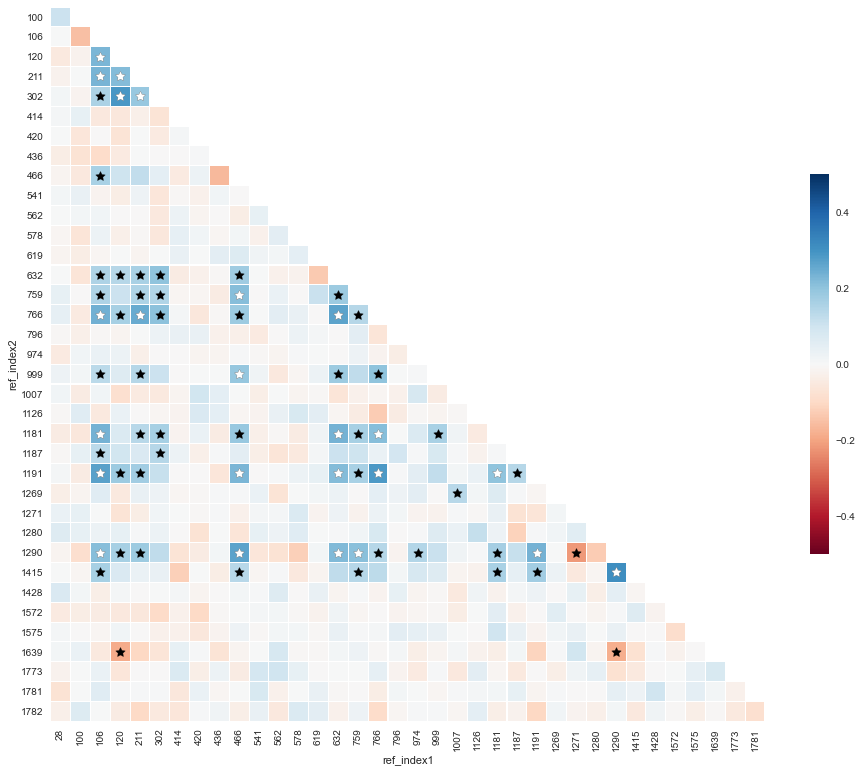

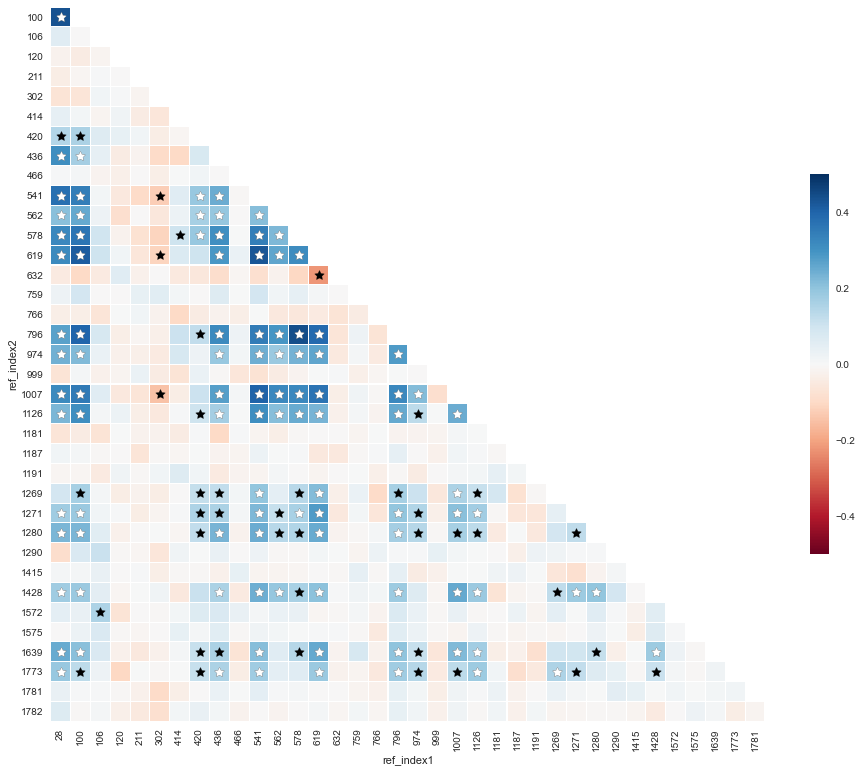

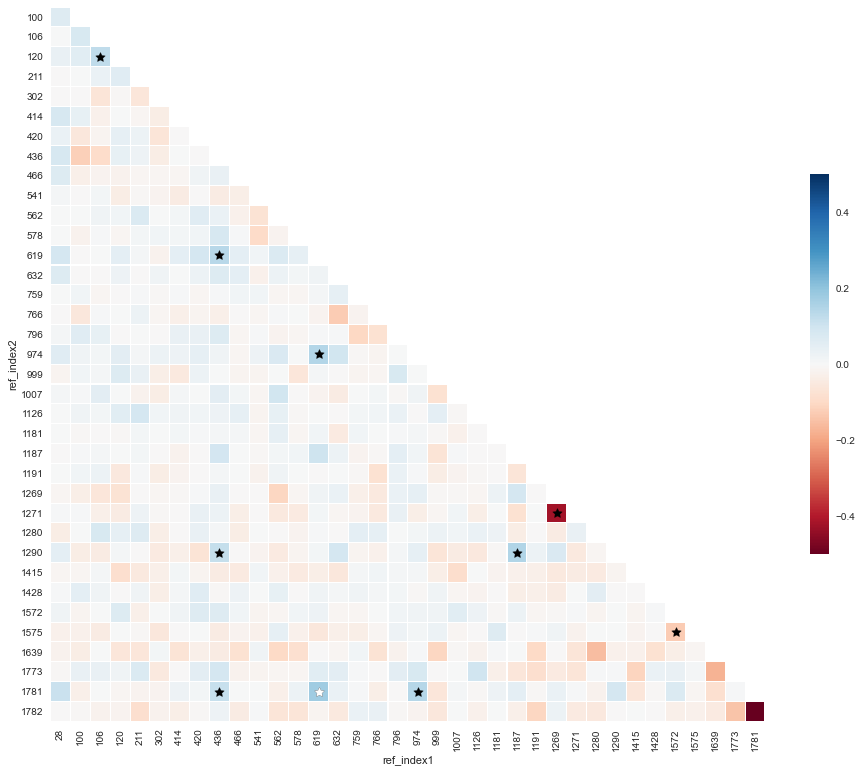

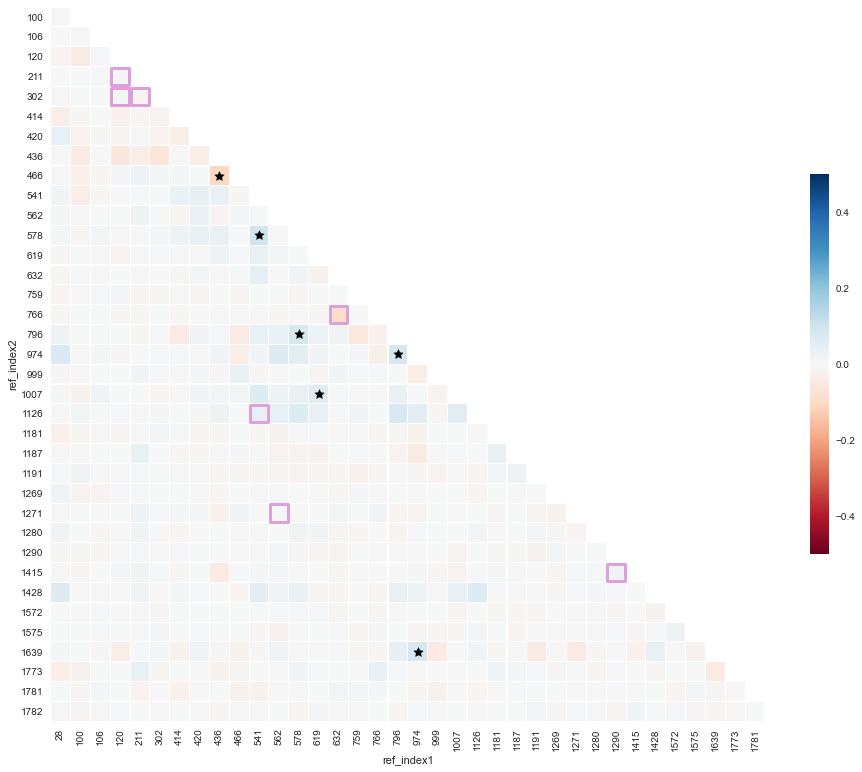

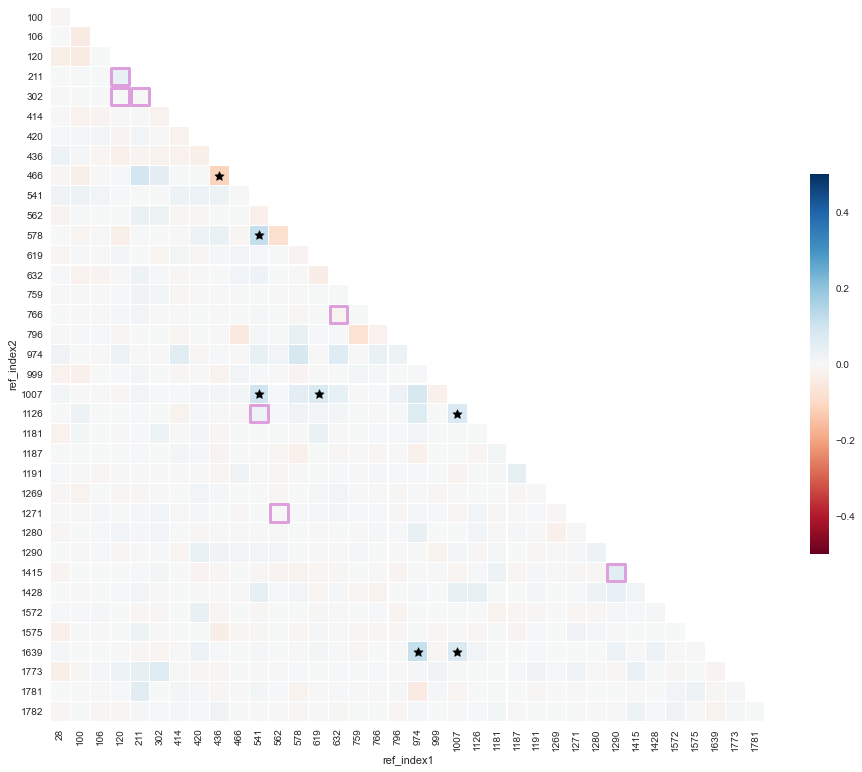

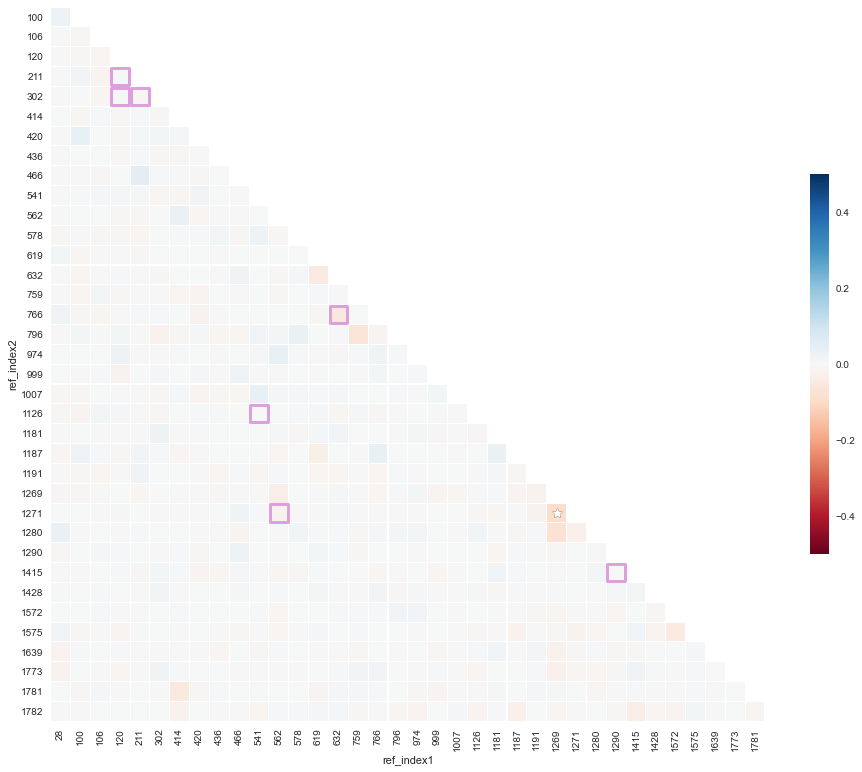

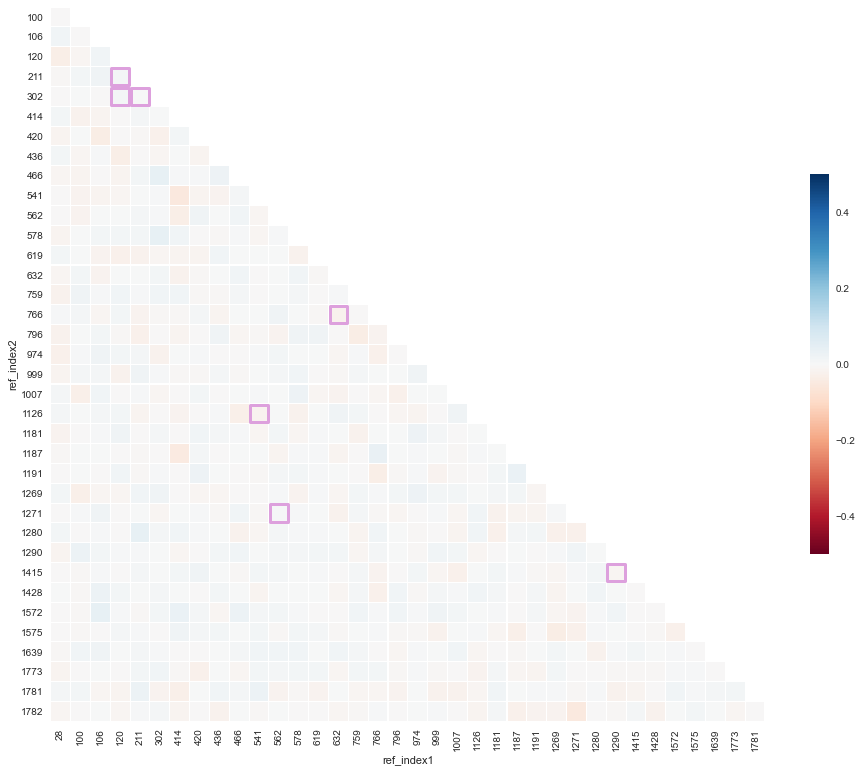

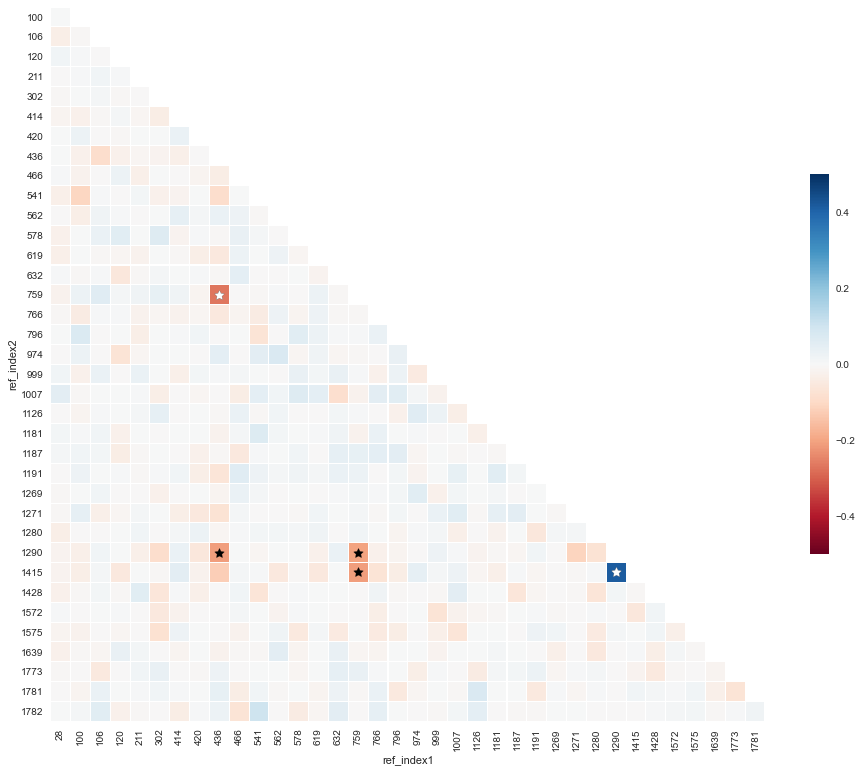

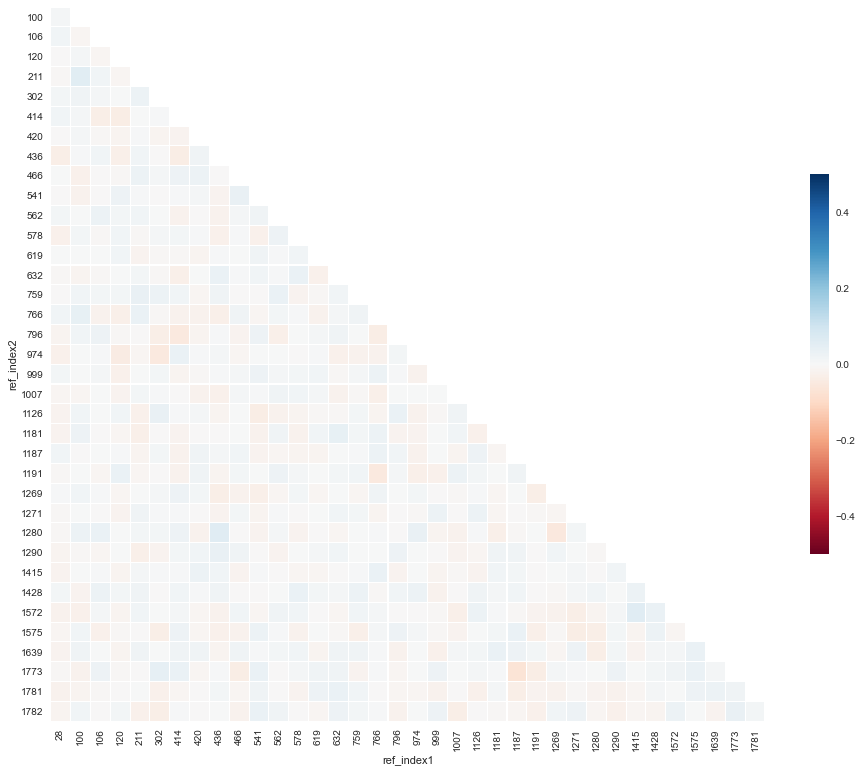

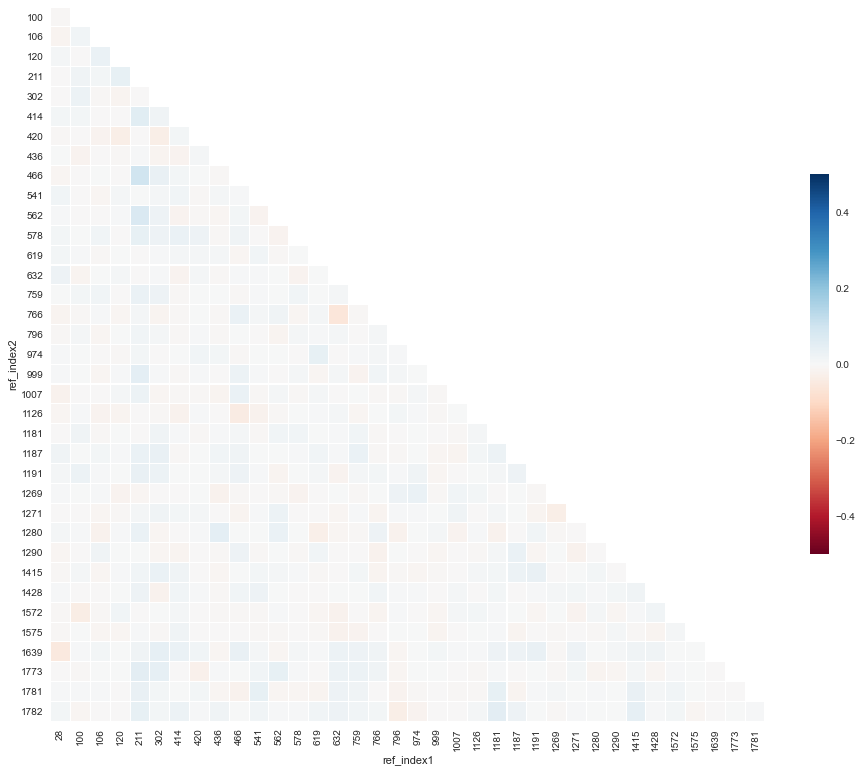

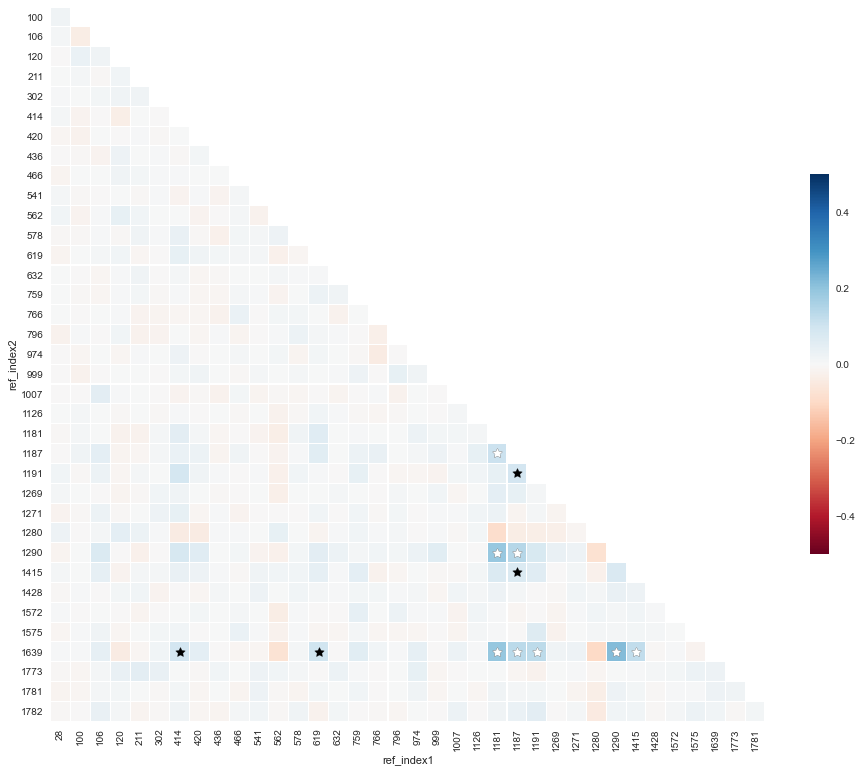

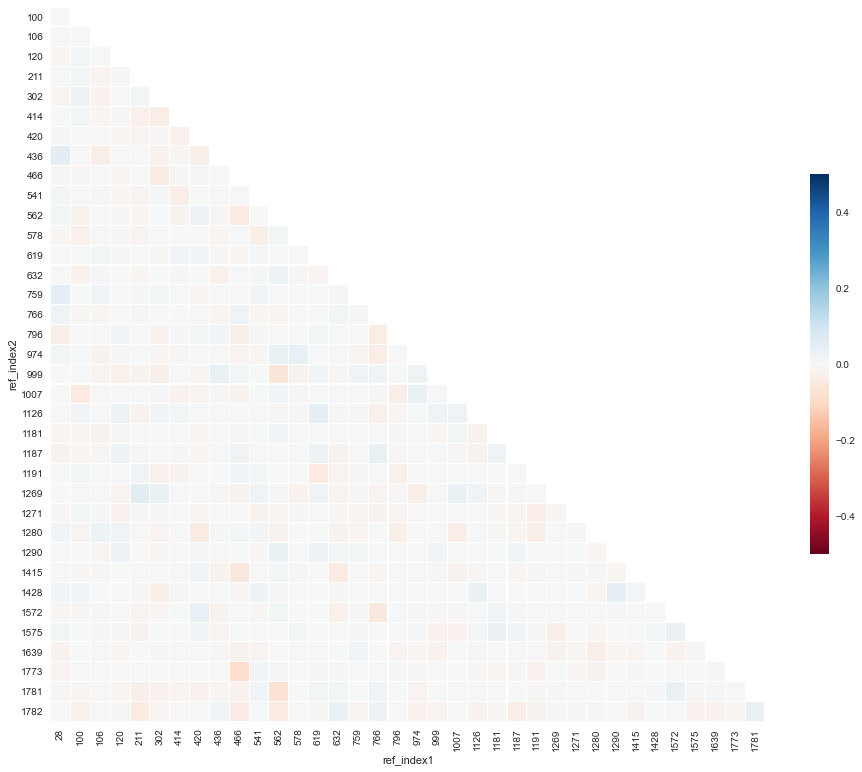

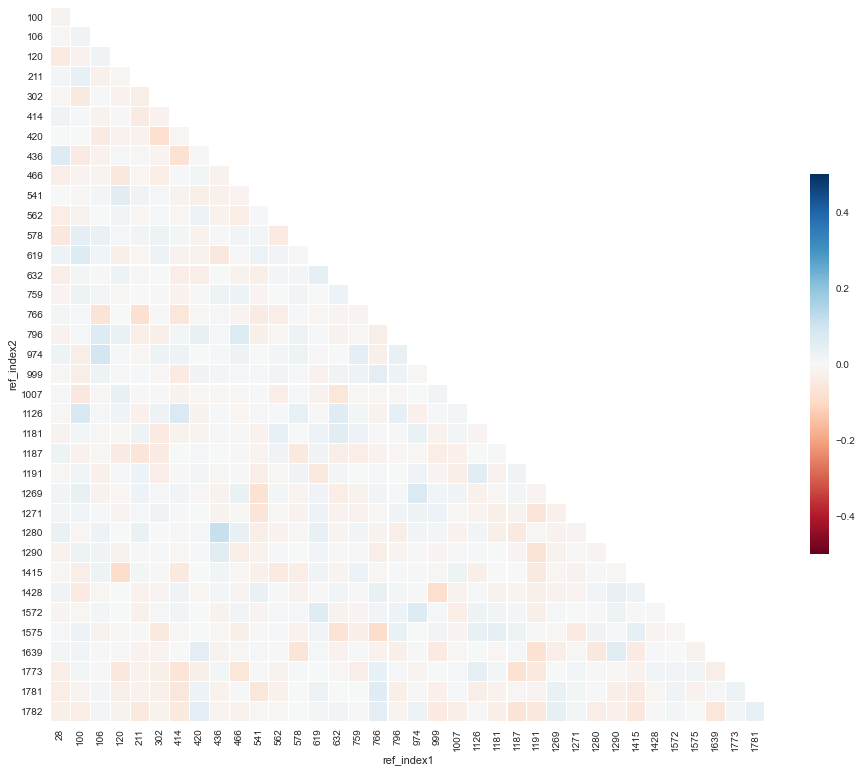

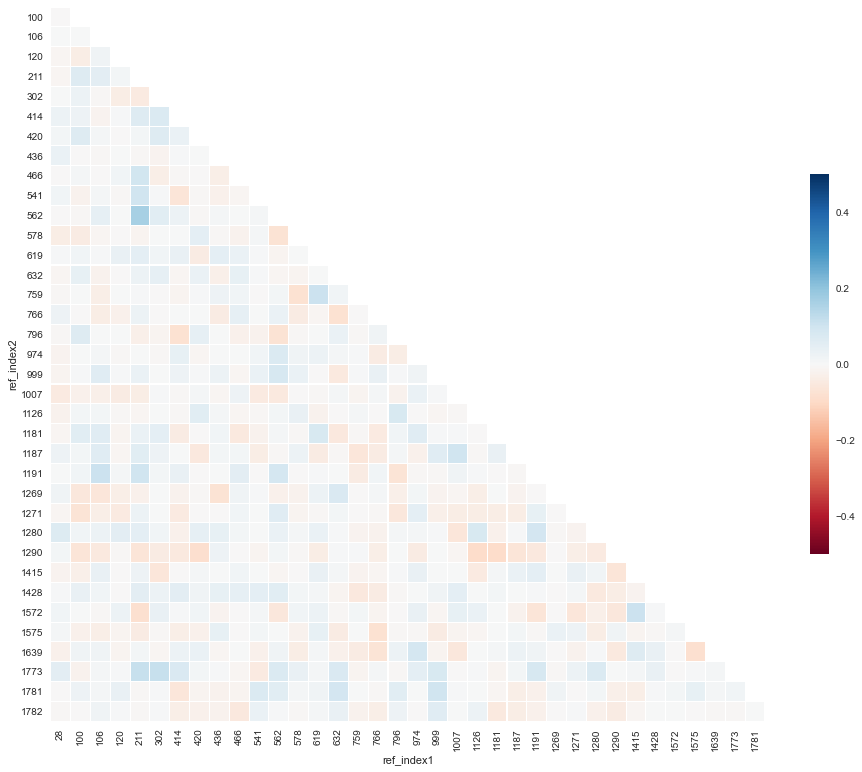

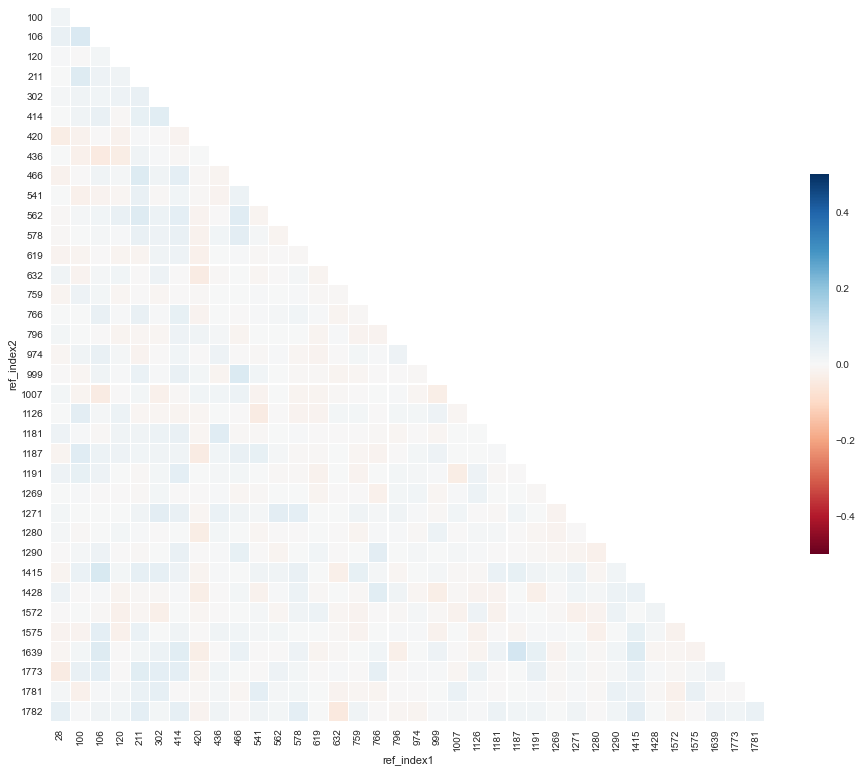

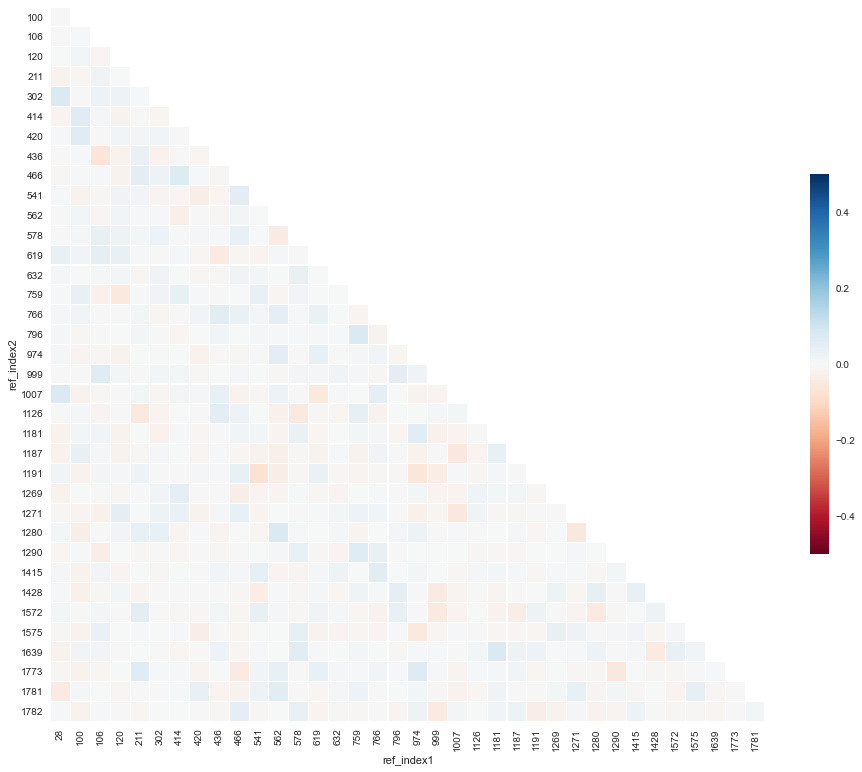

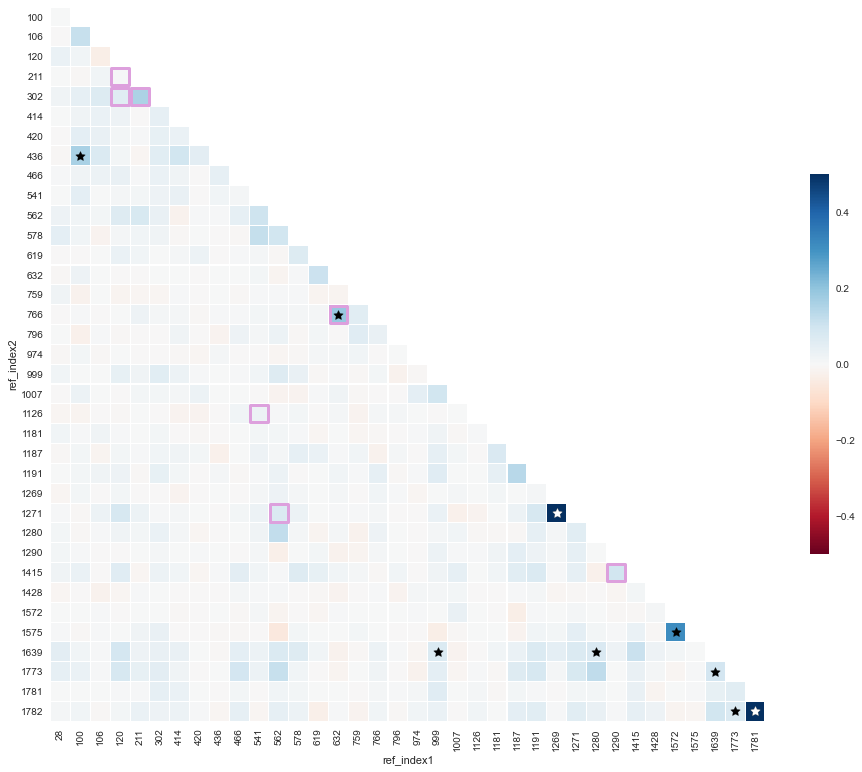

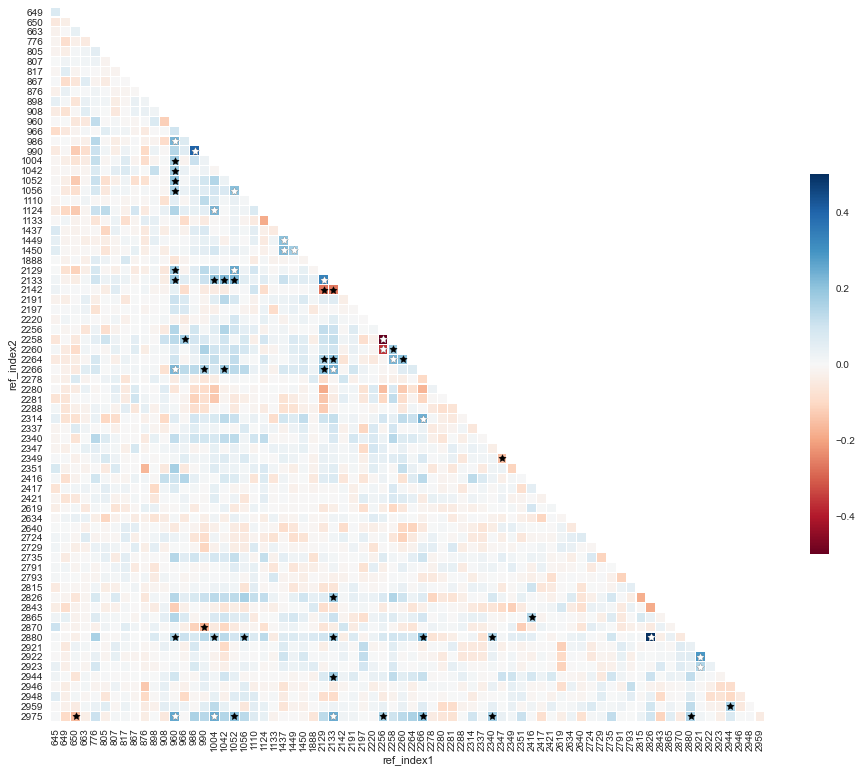

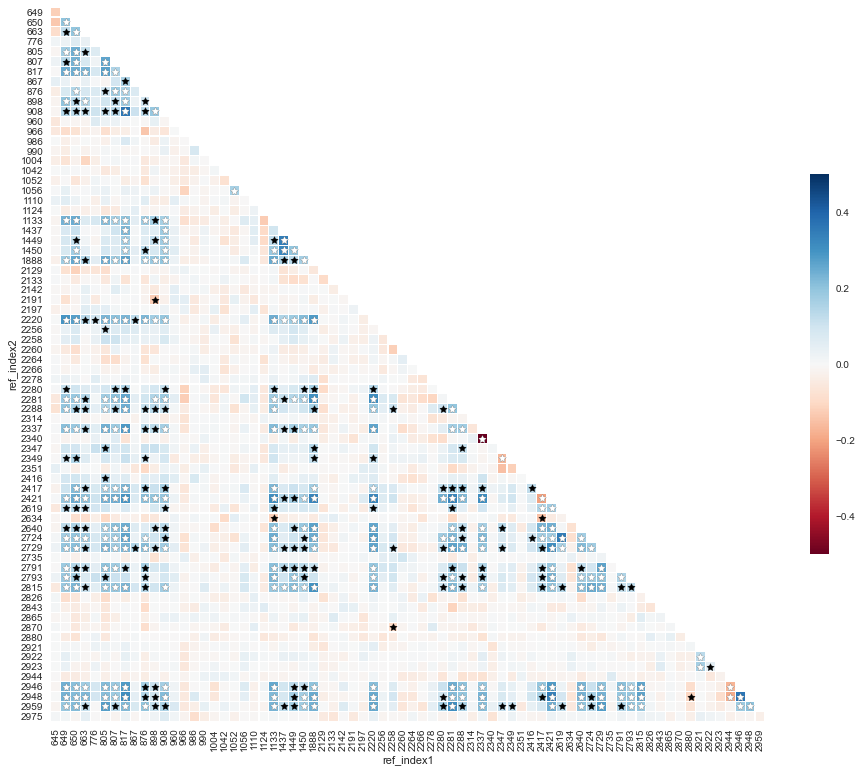

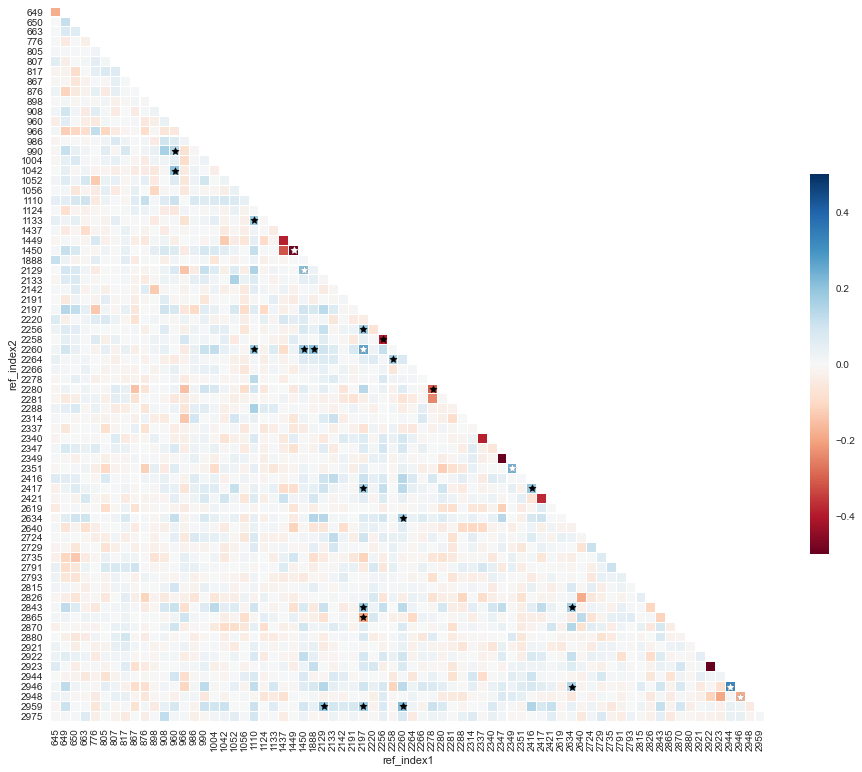

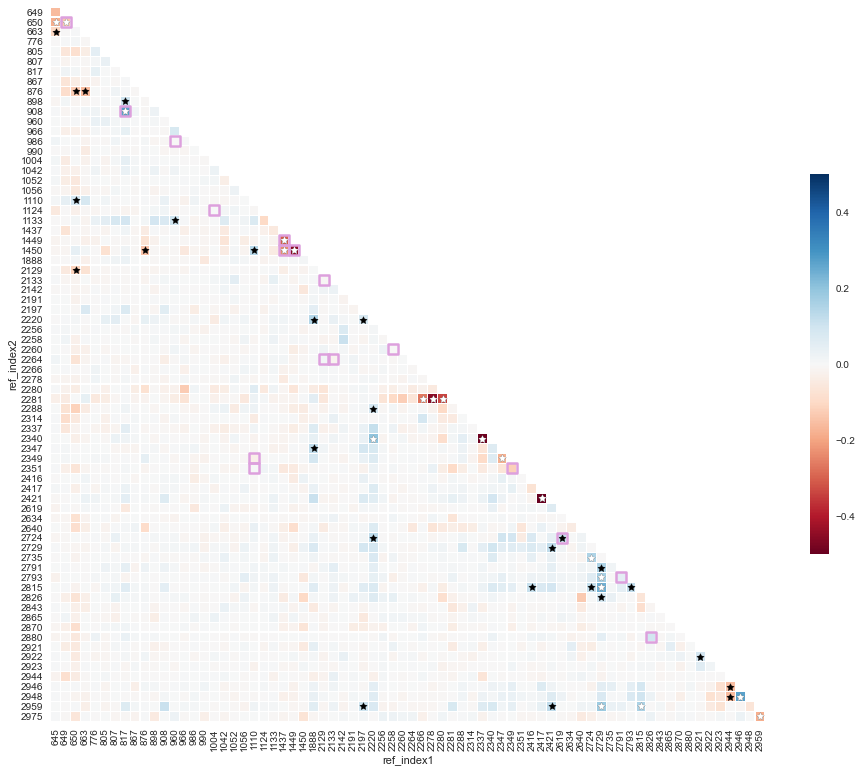

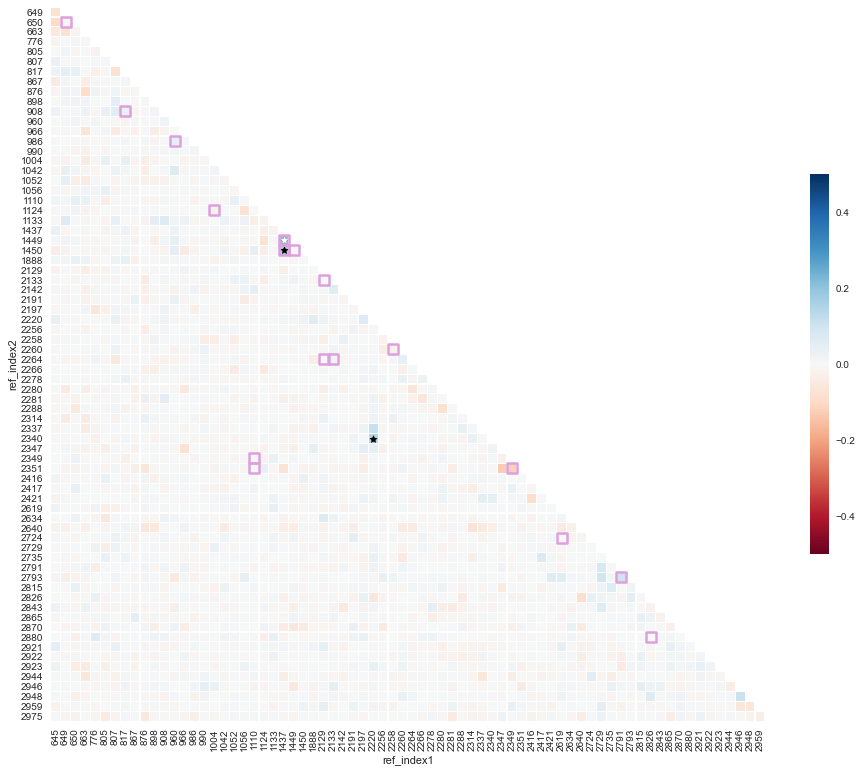

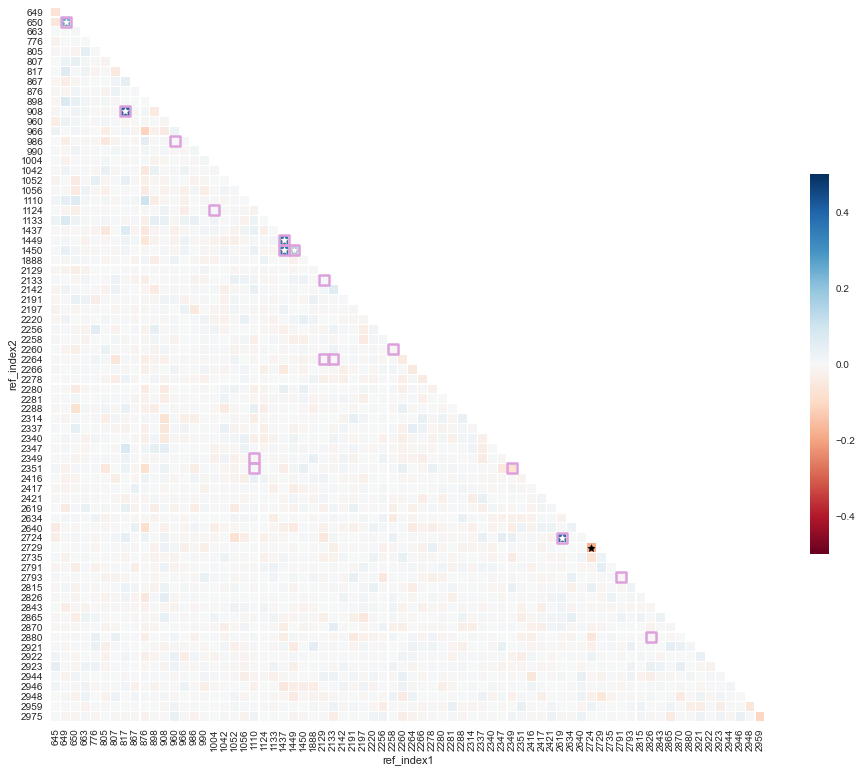

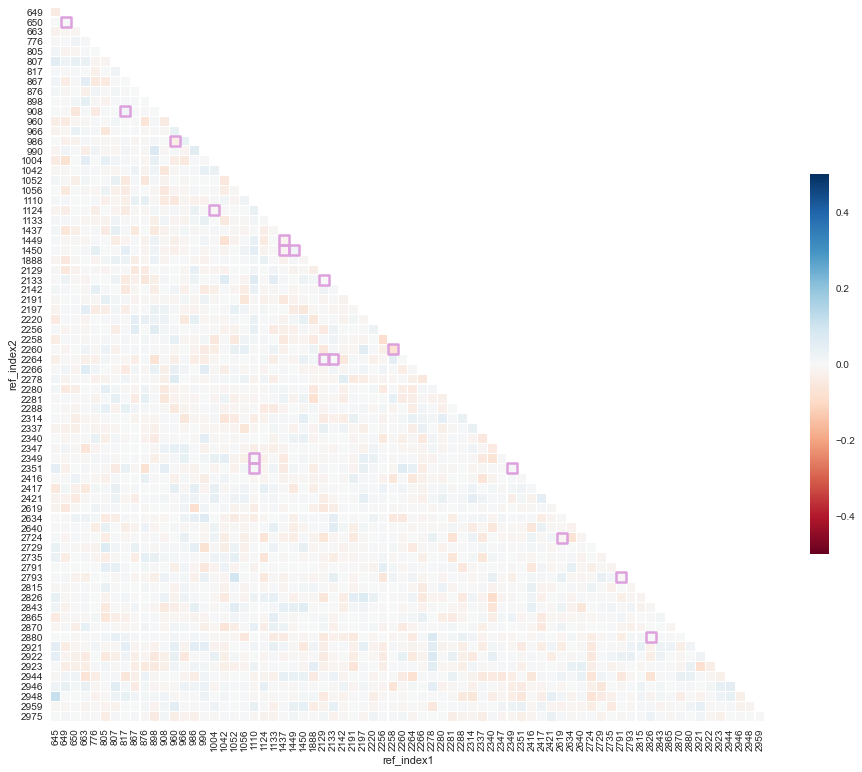

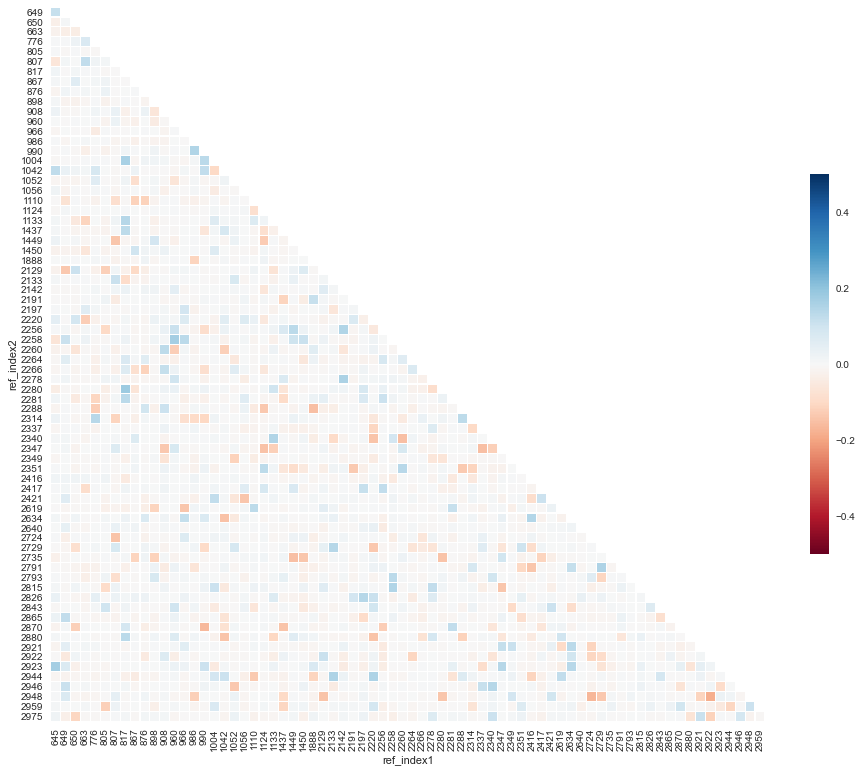

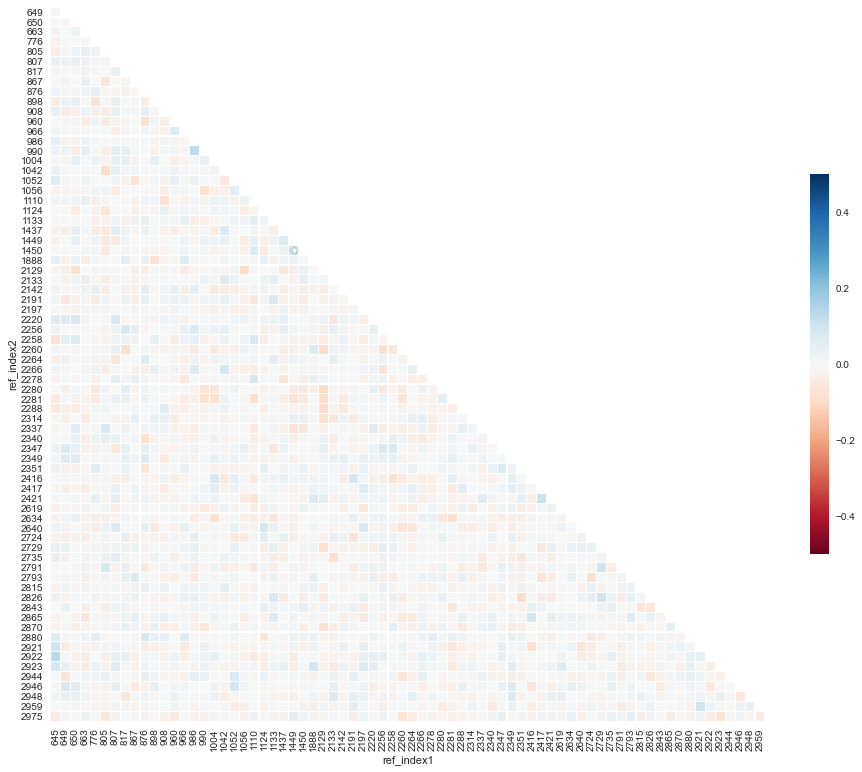

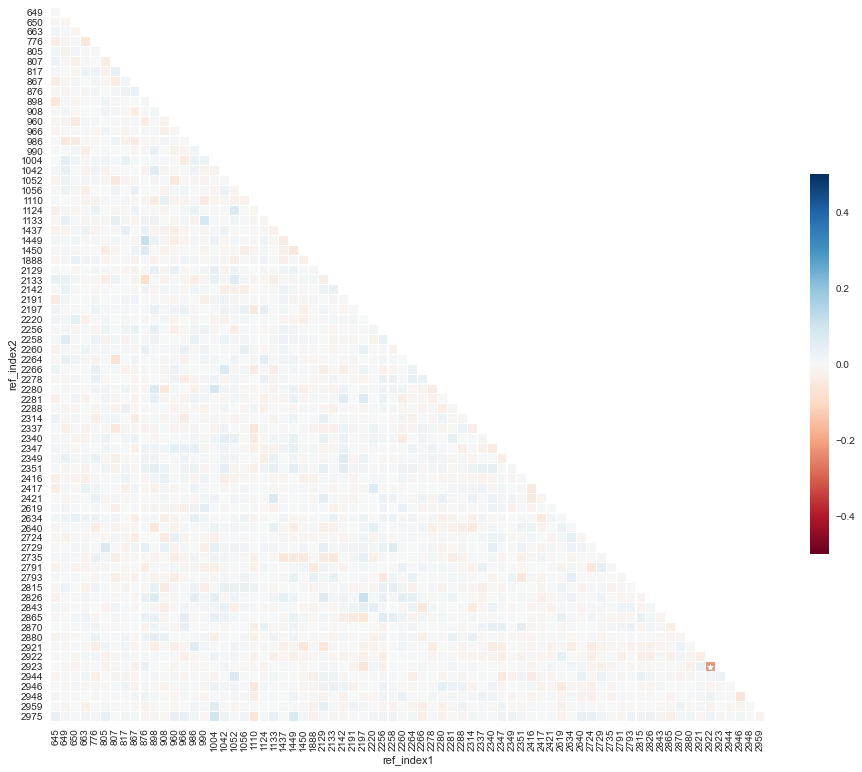

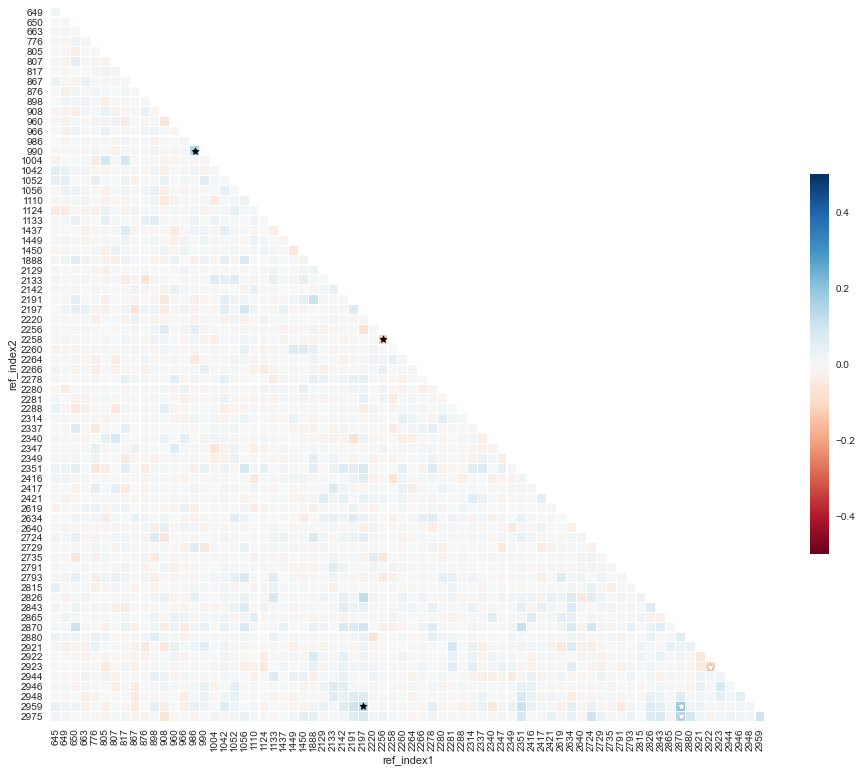

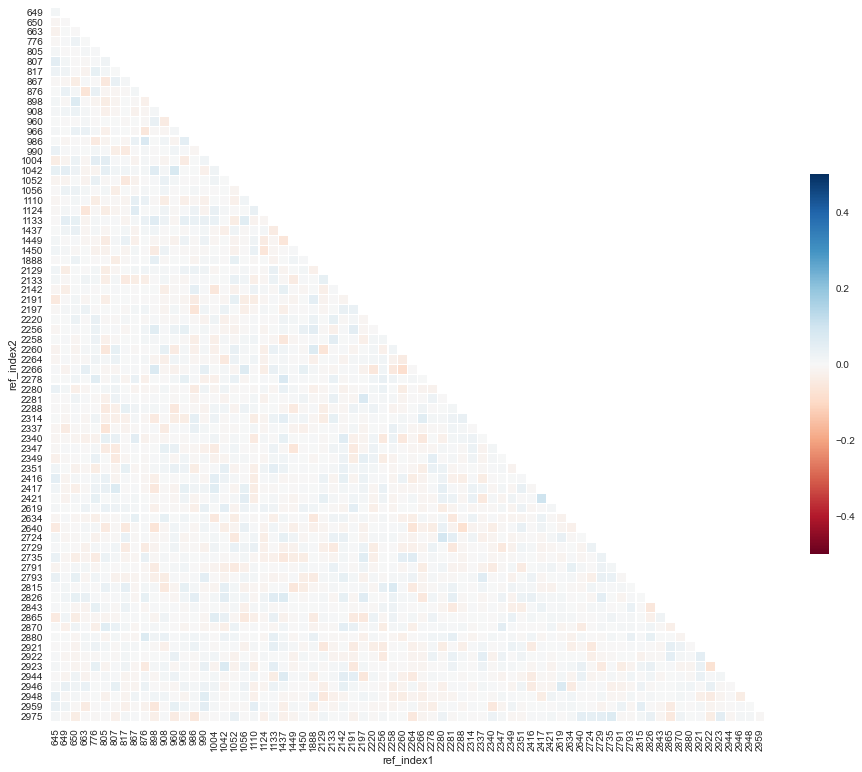

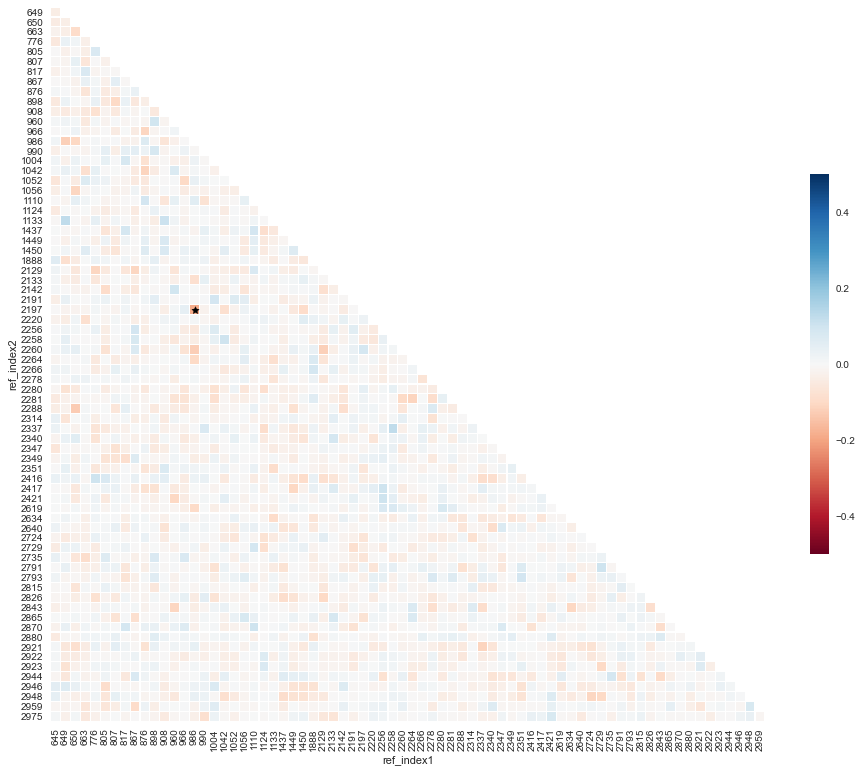

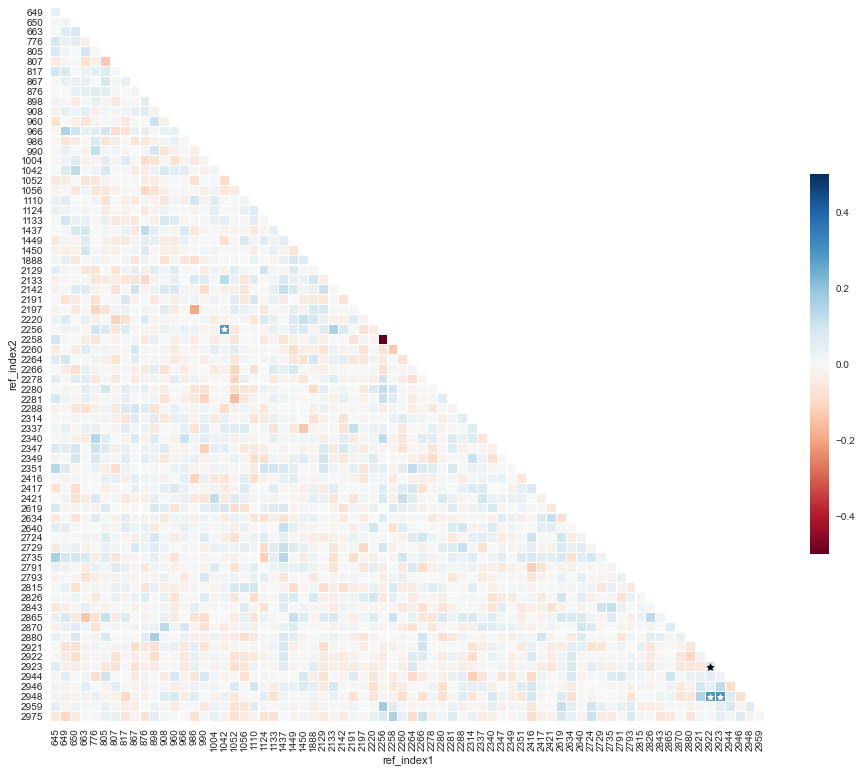

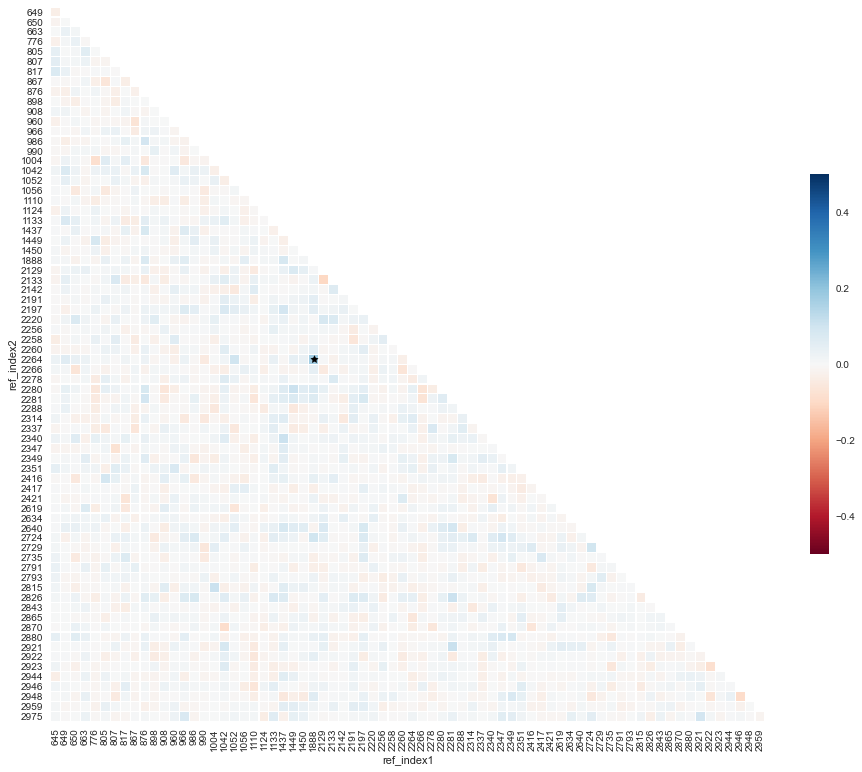

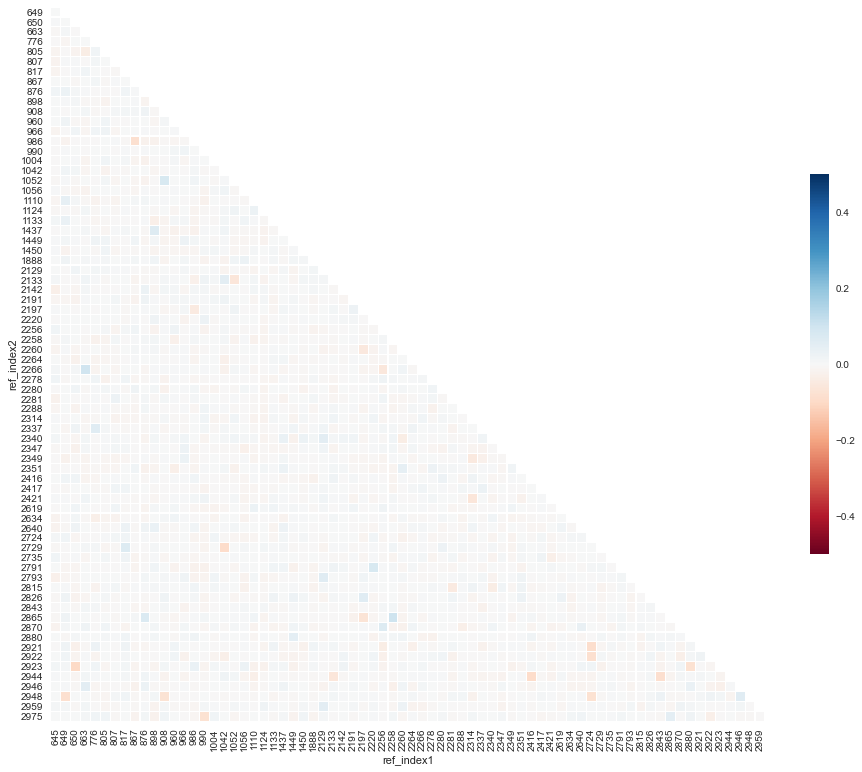

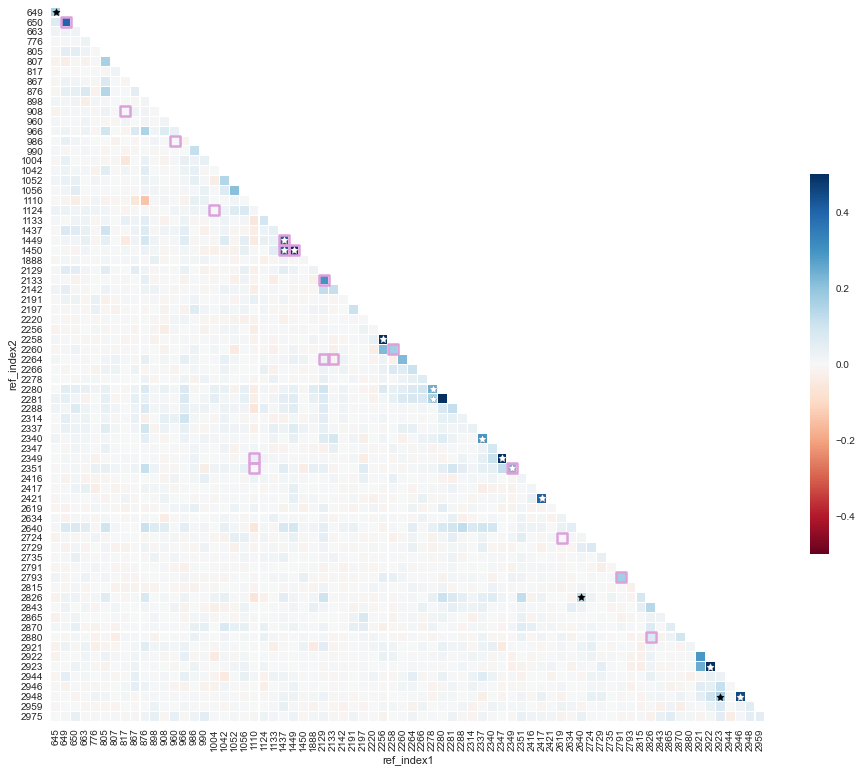

In [8]:
for s, contig in zip([100, 60], ["RDN18-1", "RDN25-1"]):
    all_labels = ["CBF5GLU", "NOP58GLU", "IVT"] 
    for label in all_labels:
        figure_path = f"figures/{contig}_{label}_correlations.png"
        exp_diff, mapper, exp_pvalues, exp_comparison_pvalues = get_max_correlation_diff_pvalues(label, contig)
        plot_correlation_heatmap(exp_diff, mapper, exp_pvalues, exp_comparison_pvalues,
                                 figure_path=figure_path, s=s)

    all_labels = [["prx1", "prx1_2"], ["prp43", "prp43_2"], ["Dbp3d_YPD", "Dbp3d_YPD2"], "sqs1d_YPD"]
    for label in all_labels:
        figure_path = f"figures/{contig}_{label}_correlations.png"
        exp_diff, mapper, exp_pvalues, exp_comparison_pvalues = get_max_correlation_diff_pvalues(label, contig)
        plot_correlation_heatmap(exp_diff, mapper, exp_pvalues, exp_comparison_pvalues,
                                 figure_path=figure_path, s=s, snorna=True)

#     all_labels = ["snR4d_alpha_YPD", "mutant452", "mutant451", "mutant448_2", "snR45d_YPD", ["MIX_2", "Mix"]] 
    all_labels = [["MIX_2", "Mix"]] 

    for label in all_labels:
        figure_path = f"figures/{contig}_{label}_correlations.png"
        figure_path = None
        exp_diff, mapper, exp_pvalues, exp_comparison_pvalues = get_max_correlation_diff_pvalues(label, contig)
        plot_correlation_heatmap(exp_diff, mapper, exp_pvalues, exp_comparison_pvalues,
                                 figure_path=figure_path, s=s)

    all_labels = ["dbr1d_YPD", "spp382_YPD", "prp16_18deg_YPD"] 
    for label in all_labels:
        figure_path = f"figures/{contig}_{label}_correlations.png"
        exp_diff, mapper, exp_pvalues, exp_comparison_pvalues = get_max_correlation_diff_pvalues(label, contig)
        plot_correlation_heatmap(exp_diff, mapper, exp_pvalues, exp_comparison_pvalues,
                                 figure_path=figure_path, s=s)

    all_labels = ["WT_KOAC", "WT_CY", "WT_stationary", "WT_rapa5", ["YS602_18_YPD", "YS602_18_YPD2", "YS602_18_YPD3"]] 
    for label in all_labels:
        figure_path = f"figures/{contig}_{label}_correlations.png"
        exp_diff, mapper, exp_pvalues, exp_comparison_pvalues = get_max_correlation_diff_pvalues(label, contig)
        plot_correlation_heatmap(exp_diff, mapper, exp_pvalues, exp_comparison_pvalues,
                                 figure_path=figure_path, s=s)

    figure_path = f"figures/{contig}_WT_vs_IVT_correlations.png"
    exp_diff, mapper, exp_pvalues, exp_comparison_pvalues = get_max_correlation_diff_pvalues(["WT_YPD", "WT_YPD2", "WT_YPD3"], 
                                                                                             contig, 
                                                                                             compare_labels=["IVT"], 
                                                                                             diff=False)

    plot_correlation_heatmap(exp_diff, mapper, exp_comparison_pvalues, exp_pvalues,  
                             figure_path=figure_path, s=s, snorna=True)

